In [59]:
%load_ext autoreload
%autoreload 2

import pickle
import numpy as np
from scipy.signal import find_peaks
from matplotlib import pyplot as plt
import seaborn as sns

from src.network import Layer
from src.ou_process import ouprocess_gaussian
from src.experiment import Experiment

sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
NUM_NEURONS = 1000 # 100
tau_V = 10
R = 1 # MOhm
EL = -70.0
V_th = -40.0
dt = 0.1 # msec
t_stop = 1.0e3 # 50.0e3

In [37]:
# Slow Signal: INPUT
input_slow, _ = ouprocess_gaussian(50.0, dt, t_stop, 1)
i_inj = 16.0 + 6.0*input_slow

In [38]:
layer = Layer(NUM_NEURONS)
layer.train(i_inj=i_inj, exp_output=i_inj, dt=dt, t_stop=t_stop)
out, V, F_binary, F_synaptic = layer.output(i_inj, dt, t_stop)

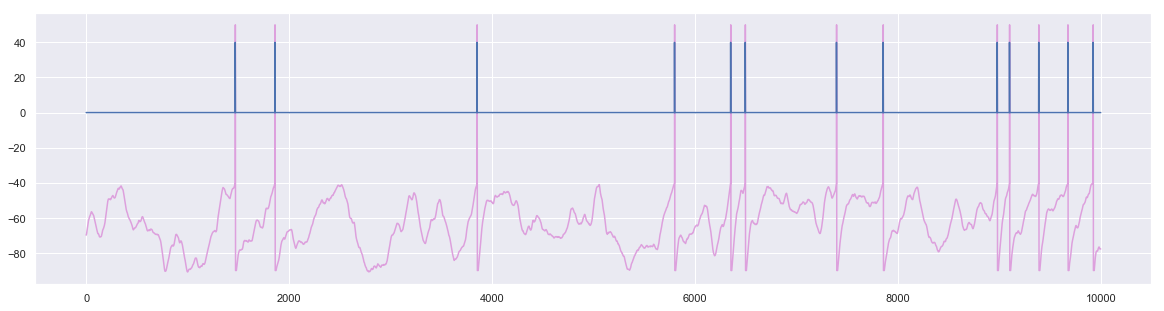

In [39]:
trial = 10
t_i = 0
t_f = -1
plt.figure(figsize=(20,5))
plt.plot(V[t_i:t_f,trial], color='plum')
plt.plot(F_binary[t_i:t_f,trial] * 40.0)
plt.show()

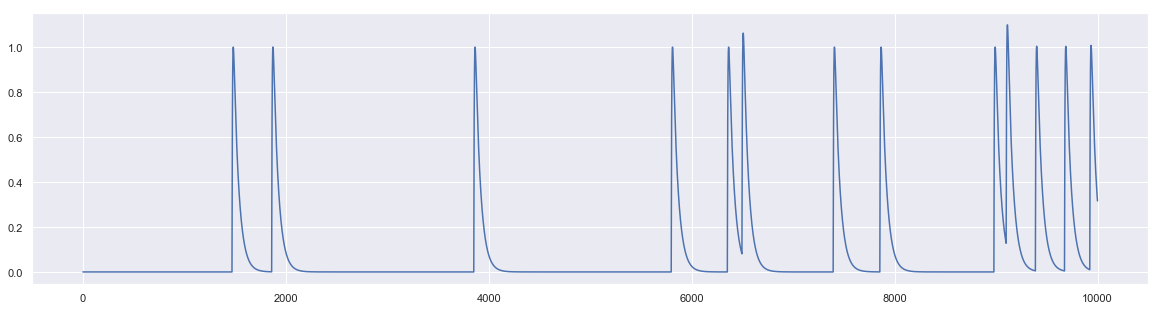

In [41]:
plt.figure(figsize=(20,5))
plt.plot(F_synaptic[:,10])

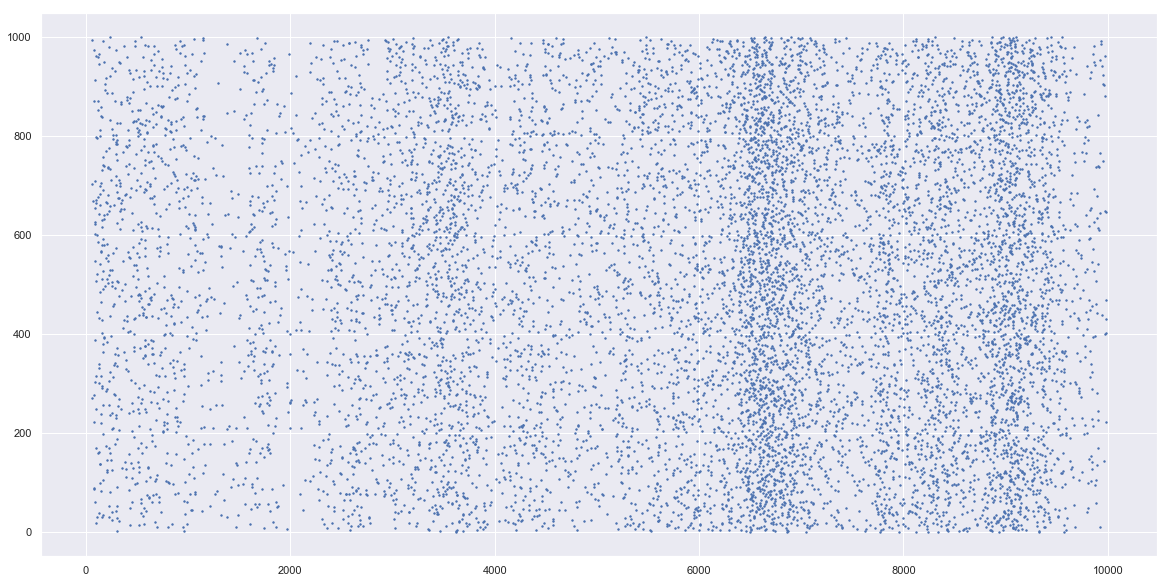

In [42]:
spike_inds, spike_trial = np.where(F_binary > 0)
plt.figure(figsize=(20,10))
plt.scatter(spike_inds, spike_trial, s=2)

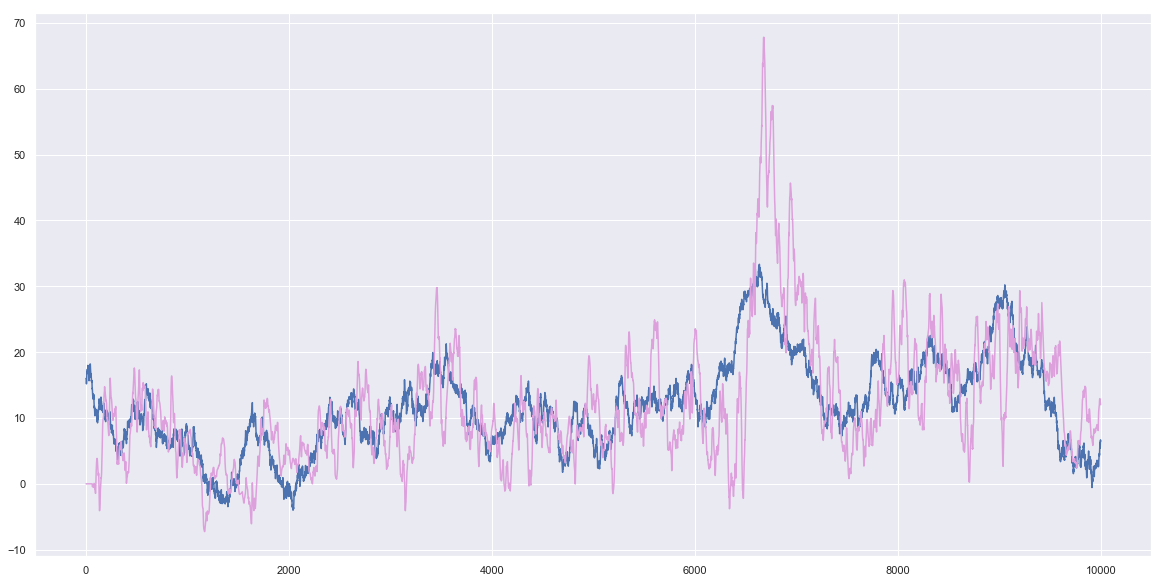

In [43]:
plt.figure(figsize=(20,10))
plt.plot(i_inj)
plt.plot(out, 'plum')

In [44]:
np.linalg.norm(out-i_inj)

761.2438829573431

In [68]:
NUM_TRIALS = 200

inputs = np.empty((num_t, NUM_TRIALS))

for i in range(NUM_TRIALS):
    input_slow, _ = ouprocess_gaussian(50.0, dt, t_stop, 1)
    i_inj = 16.0 + 6.0*input_slow
    inputs[:,i] = i_inj.flatten()

KeyboardInterrupt: 

In [60]:
experiment = Experiment(inputs, layer, NUM_TRIALS, dt, t_stop)

with open("1000_neurons_input=tau_50_regenerated.pkl", 'wb') as pickle_out:  
    pickle.dump(experiment, pickle_out)

In [61]:
loaded_exp = pickle.load(open("1000_neurons_input=tau_50_regenerated.pkl","rb"))

In [64]:
l2_norms = np.empty((loaded_exp.num_trials))

for i in range(loaded_exp.num_trials):
    l2_norms[i] = np.linalg.norm(loaded_exp.outputs[:, i]-loaded_exp.inputs[:, i])

(array([1., 1., 1., 0., 0., 2., 2., 1., 0., 2.]),
 array([1333.65498293, 1412.74028679, 1491.82559066, 1570.91089452,
        1649.99619838, 1729.08150225, 1808.16680611, 1887.25210997,
        1966.33741383, 2045.4227177 , 2124.50802156]),
 <a list of 10 Patch objects>)

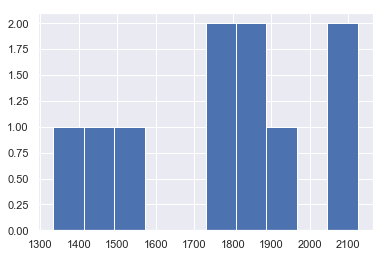

In [67]:
plt.hist(l2_norms)

In [ ]:
import time
start_time = time.time()
loop_time = start_time

# Plotting L2 Norm between original signal and reconstructed signal
NUM_TRIALS = 50

# Construct inputs
num_t = np.arange(0.0, t_stop, dt).shape[0]
inputs = np.empty((num_t, NUM_TRIALS))
outs = np.empty((num_t, NUM_TRIALS))
spike_times = []

for i in range(NUM_TRIALS):
    input_slow, _ = ouprocess_gaussian(50.0, dt, t_stop, 1)
    i_inj = 16.0 + 6.0*input_slow
    inputs[:,i] = i_inj.flatten()

    out, _, f_binary, _ = layer.output(i_inj, dt, t_stop)

    times, neurons = np.where(F_binary != 0)

    outs[:, i] = out.flatten()
    spike_times.append()

    if i % 1 == 0:
        print("Trial ", i)
        print("10 Iter time: ", time.time() - loop_time)
        print("Total time: ", time.time() - start_time)
        print("\n")
        loop_time = time.time()

np.savez("exp1_1e3_neur_1e3_time_50_trials.npz", layer_w=layer.W, inputs=inputs, outs=outs, Vs=Vs)

(array([ 2.,  4., 12.,  8., 22., 25., 32., 25., 21., 12., 11.,  6.,  6.,
         7.,  1.,  0.,  5.,  0.,  0.,  1.]),
 array([575.86441727, 592.21956233, 608.57470739, 624.92985244,
        641.2849975 , 657.64014256, 673.99528762, 690.35043268,
        706.70557774, 723.0607228 , 739.41586785, 755.77101291,
        772.12615797, 788.48130303, 804.83644809, 821.19159315,
        837.5467382 , 853.90188326, 870.25702832, 886.61217338,
        902.96731844]),
 <a list of 20 Patch objects>)

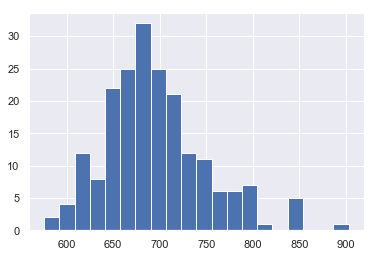

In [19]:
plt.hist(l2_norms, bins=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x1eb10270ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x1eb1027b208>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eb10270898>],
 'medians': [<matplotlib.lines.Line2D at 0x1eb1027b908>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eb1027bc88>],
 'means': []}

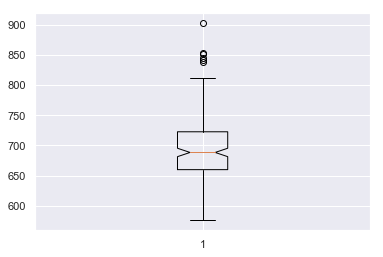

In [22]:
plt.boxplot(l2_norms, notch=True, sym="o")